In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
%pprint off
plt.style.use('seaborn')

Pretty printing has been turned ON


In [32]:
df_all = pd.read_csv('data/cleaned.csv')
len(df_all)

593956

In [33]:
df_all = df_all.set_index(pd.to_datetime(df_all['localminute']), drop=True)

In [34]:
df_all = df_all.drop(columns=['Unnamed: 0', 'localminute'])

In [35]:
display(df_all.head(), len(df_all))

,marginal_change,cumul_value,meterid
localminute,,,
2015-10-01 05:00:00,0.0,93470.0,35
2015-10-01 06:00:00,0.0,93470.0,35
2015-10-01 07:00:00,0.0,93470.0,35
2015-10-01 08:00:00,0.0,93470.0,35
2015-10-01 09:00:00,0.0,93470.0,35


593956

In [36]:
groups = df_all.groupby('meterid')
keys = groups.groups.keys()  # keys: an iterable of dataids or meter ids

In [37]:
id_list = list(keys)
id_list.remove(8703)  # meterid 8703 was found to have data for only 2 weeks in Oct.
display(id_list, len(id_list))

[35,
 44,
 77,
 94,
 114,
 187,
 222,
 252,
 370,
 483,
 484,
 661,
 739,
 744,
 871,
 1042,
 1086,
 1103,
 1185,
 1283,
 1403,
 1415,
 1507,
 1556,
 1589,
 1619,
 1697,
 1714,
 1718,
 1790,
 1791,
 1792,
 1800,
 1801,
 2018,
 2034,
 2072,
 2094,
 2129,
 2233,
 2335,
 2378,
 2449,
 2461,
 2470,
 2575,
 2638,
 2755,
 2814,
 2818,
 2945,
 2946,
 2965,
 2980,
 3036,
 3039,
 3134,
 3310,
 3367,
 3527,
 3544,
 3577,
 3635,
 3723,
 3778,
 3849,
 3893,
 3918,
 4029,
 4031,
 4193,
 4228,
 4296,
 4352,
 4356,
 4373,
 4421,
 4447,
 4514,
 4732,
 4767,
 4998,
 5129,
 5131,
 5193,
 5275,
 5317,
 5395,
 5403,
 5439,
 5484,
 5636,
 5658,
 5785,
 5810,
 5814,
 5892,
 5972,
 6412,
 6505,
 6578,
 6673,
 6685,
 6830,
 6836,
 6863,
 6910,
 7016,
 7017,
 7030,
 7117,
 7287,
 7429,
 7460,
 7674,
 7682,
 7739,
 7741,
 7794,
 7900,
 7919,
 7965,
 7989,
 8059,
 8084,
 8086,
 8155,
 8156,
 8244,
 8386,
 8467,
 8829,
 8890,
 8967,
 9052,
 9121,
 9134,
 9160,
 9278,
 9295,
 9474,
 9600,
 9631,
 9639,
 9729,
 976

149

### Visualize meter data.

In [38]:
# for i in id_list:
#     df_i = groups.get_group(i)
#     #df_i['cumul_value'].plot(figsize=(15,4), title=f'meter {i}, {len(df_i)} samples')
#     plt.cla()
#     fig = plt.gcf()
#     fig.set_size_inches(15,4)
#     plt.title(f'meter {i}, {len(df_i)} samples')
#     plt.scatter(x=df_i.index, y=df_i['cumul_value'])
#     plt.show()

In [39]:
# get list of meterids whose first datapoint is at least as early as pre-specified 'origin_date'.
# and whose last datapoint is after some specified 'end_date'?
# the reason is to get a set of data that can be normalized and then fed as regression input.

origin_date = '2015-11-01'

valid_list = []
for meterid in id_list:
    df_i = groups.get_group(meterid)
    if df_i.index[0] <= pd.to_datetime(origin_date):
        valid_list.append(meterid)

display(valid_list, len(valid_list))

[35,
 44,
 77,
 94,
 114,
 187,
 222,
 252,
 370,
 483,
 484,
 661,
 739,
 744,
 871,
 1042,
 1086,
 1103,
 1185,
 1283,
 1415,
 1507,
 1556,
 1589,
 1619,
 1697,
 1714,
 1718,
 1790,
 1791,
 1792,
 1800,
 1801,
 2018,
 2034,
 2072,
 2094,
 2129,
 2233,
 2335,
 2378,
 2449,
 2461,
 2470,
 2575,
 2638,
 2818,
 2945,
 2965,
 2980,
 3039,
 3134,
 3310,
 3367,
 3527,
 3544,
 3577,
 3635,
 3723,
 3778,
 3849,
 3893,
 3918,
 4029,
 4031,
 4193,
 4228,
 4296,
 4352,
 4356,
 4373,
 4421,
 4447,
 4514,
 4732,
 4767,
 4998,
 5129,
 5131,
 5193,
 5275,
 5395,
 5403,
 5439,
 5484,
 5636,
 5785,
 5810,
 5814,
 5892,
 5972,
 6412,
 6505,
 6578,
 6685,
 6830,
 6836,
 6863,
 6910,
 7016,
 7017,
 7030,
 7117,
 7287,
 7429,
 7460,
 7674,
 7682,
 7739,
 7741,
 7794,
 7900,
 7919,
 7965,
 7989,
 8059,
 8084,
 8086,
 8155,
 8156,
 8386,
 8467,
 8829,
 8890,
 8967,
 9052,
 9121,
 9134,
 9278,
 9295,
 9474,
 9631,
 9639,
 9729,
 9766,
 9849,
 9956,
 9982]

138

In [40]:
# normalize the cumulative values before fitting the model over the values!!

def normalize_cumul(df, start_date):
    '''
    normalize the cumul values towards a common start_date.
    
    df: dataframe. dataframe representing one meterid's data. df must have datetimeindex, and 'cumul_value' column
    '''
    df1 = df.loc[df.index >= pd.to_datetime(start_date)]
    const = df1['cumul_value'].iloc[0]  # get first cumul value.
    ser_norm = df1['cumul_value'] - const
    df_new = df1.assign(norm_cumul_value=ser_norm).drop(columns=['cumul_value'])
    
    return df_new

df_eg = normalize_cumul(df_i, origin_date)
display(df_eg.head(10), df_eg.tail(10))

,marginal_change,meterid,norm_cumul_value
localminute,,,
2015-11-01 00:00:00,4.0,9982,0.0
2015-11-01 01:00:00,0.0,9982,0.0
2015-11-01 02:00:00,0.0,9982,0.0
2015-11-01 03:00:00,0.0,9982,0.0
2015-11-01 04:00:00,8.0,9982,8.0
2015-11-01 05:00:00,0.0,9982,8.0
2015-11-01 06:00:00,0.0,9982,8.0
2015-11-01 07:00:00,0.0,9982,8.0
2015-11-01 08:00:00,0.0,9982,8.0


,marginal_change,meterid,norm_cumul_value
localminute,,,
2016-03-31 07:00:00,0.0,9982,12574.0
2016-03-31 08:00:00,0.0,9982,12574.0
2016-03-31 09:00:00,0.0,9982,12574.0
2016-03-31 10:00:00,0.0,9982,12574.0
2016-03-31 11:00:00,0.0,9982,12574.0
2016-03-31 12:00:00,0.0,9982,12574.0
2016-03-31 13:00:00,0.0,9982,12574.0
2016-03-31 14:00:00,0.0,9982,12574.0
2016-03-31 15:00:00,0.0,9982,12574.0


### Aggregate/combined Linear Regression model (stuck here). 

In [41]:
# combine all meterids' data.
# maybe create new columns for 1 hot encoding indicating which meterid the datapoint belongs to
# it is possible to extend this model by using one-hot encoding to indicate a particular cluster of meterids instead. 


def normalize_and_combine(origin_date):
    '''
    finds all meterids that have a datapoint at origin_date and
    normalizes all cumulative readings based on that origin_date by
    subtracting the first cumul value from all cumul values for each meterid.
    effectively setting the first cumul value to 0 at origin_date, and all subsequent
    values are based off that.
    
    '''
    valid_list = []
    for meterid in id_list:
        df_i = groups.get_group(meterid)
        if df_i.index[0] <= pd.to_datetime(origin_date):
            valid_list.append(meterid)
    
    df_combinedxy = pd.DataFrame()
    for meterid in valid_list:
        df_i = groups.get_group(meterid)
        df_i = normalize_cumul(df_i, origin_date)
        df_i = df_i.reset_index()
        df_combinedxy = df_combinedxy.append(df_i, ignore_index=True)

    return df_combinedxy

df_normalized = normalize_and_combine(origin_date)
display(df_normalized.head(), df_normalized.tail(), df_normalized.describe())

,localminute,marginal_change,meterid,norm_cumul_value
0,2015-11-01 00:00:00,0.0,35,0.0
1,2015-11-01 01:00:00,12.0,35,12.0
2,2015-11-01 02:00:00,0.0,35,12.0
3,2015-11-01 03:00:00,2.0,35,14.0
4,2015-11-01 04:00:00,0.0,35,14.0


,localminute,marginal_change,meterid,norm_cumul_value
490048,2016-03-31 12:00:00,0.0,9982,12574.0
490049,2016-03-31 13:00:00,0.0,9982,12574.0
490050,2016-03-31 14:00:00,0.0,9982,12574.0
490051,2016-03-31 15:00:00,0.0,9982,12574.0
490052,2016-03-31 16:00:00,72.0,9982,12646.0


,marginal_change,meterid,norm_cumul_value
count,490053.000000,490053.000000,490053.000000
mean,5.109978,4633.380975,9437.259582
std,17.900346,2930.912281,8410.615437
min,0.000000,35.000000,0.000000
25%,0.000000,2034.000000,2548.000000
50%,0.000000,4352.000000,7658.000000
75%,2.000000,7287.000000,14500.000000
max,1640.000000,9982.000000,55700.000000


In [42]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(df_normalized['meterid'])
display(labels, len(labels))

df_normalized = df_normalized.assign(label=labels)
df_normalized.head()

array([  0,   0,   0, ..., 137, 137, 137], dtype=int64)

490053

,localminute,marginal_change,meterid,norm_cumul_value,label
0,2015-11-01 00:00:00,0.0,35,0.0,0
1,2015-11-01 01:00:00,12.0,35,12.0,0
2,2015-11-01 02:00:00,0.0,35,12.0,0
3,2015-11-01 03:00:00,2.0,35,14.0,0
4,2015-11-01 04:00:00,0.0,35,14.0,0


In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
# split dataset into train, val, test (how?)
# normalize cumul values?
# lr_model.fit(x, y)
# score on train set
# score on test set
# plot timeseries of actual value and timeseries of predicted value on same plot
# is this for each meter? or how do we generate a set of actual values representing all meters?
# plot predicted value vs actual value. plot predicted value = actual value. analyse variance and bias.

"""
if predicting an average consumption pattern, then x and y axis must be normalized. 
maybe normalize each meterid's y data by subtracting all cumul_values by the first cumul_value. 
the model then predicts the change from the first available datapoint.
!UNCLEAR how to normalize x axis. 
"""

"""
since different households (HH) have different consumption patterns, with some HH's consumption patterns being quite 
correlated with other HHs, it might be good to fit different models for each of these 'clusters'.
That way, we can get higher prediction accuracy for specific HHs in each cluster.
Can we clearly identify different clusters from the corr analysis done in Part 1?
"""

# repeat above using SVR, tune parameters with validation dataset.

"\nsince different households (HH) have different consumption patterns, with some HH's consumption patterns being quite \ncorrelated with other HHs, it might be good to fit different models for each of these 'clusters'.\nThat way, we can get higher prediction accuracy for specific HHs in each cluster.\nCan we clearly identify different clusters from the corr analysis done in Part 1?\n"

### Linear Regression model for one meterid.

In [45]:
meterid = 35
df_i = groups.get_group(meterid)
df_i.head()

,marginal_change,cumul_value,meterid
localminute,,,
2015-10-01 05:00:00,0.0,93470.0,35
2015-10-01 06:00:00,0.0,93470.0,35
2015-10-01 07:00:00,0.0,93470.0,35
2015-10-01 08:00:00,0.0,93470.0,35
2015-10-01 09:00:00,0.0,93470.0,35


In [46]:
lr_model = LinearRegression()

# convert DateTimeIndex to numerical values for regression.
# each hour is now denoted by an integer.
X = np.arange(start=0, stop=len(df_i.index), step=1).reshape(-1, 1)

y = df_i['cumul_value']
# should we shift y axis down by first cumul value? more meaningful? can more easily compare across meterids?

In [47]:
# split dataset

valid_start, test_start = int(len(df_i)*0.7), int(len(df_i)*0.8)
x_train, x_valid, x_test = X[:valid_start,:], X[valid_start:test_start,:], X[test_start:,:]
y_train, y_valid, y_test = y[:valid_start], y[valid_start:test_start], y[test_start:]

In [48]:
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# run predictions and get scores

y_train_pred = lr_model.predict(x_train)
r2_train = lr_model.score(x_train, y_train)

y_valid_pred = lr_model.predict(x_valid)
r2_valid = lr_model.score(x_valid, y_valid)

y_test_pred = lr_model.predict(x_test)
r2_test = lr_model.score(x_test, y_test)

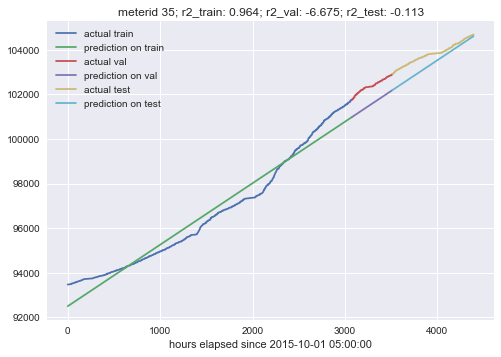

In [50]:
# plot results

plt.title(f'meterid {meterid}; r2_train: {r2_train:.3f}; r2_val: {r2_valid:.3f}; r2_test: {r2_test:.3f}')
plt.xlabel(f'hours elapsed since {df_i.index[0]}') 
plt.plot(x_train, y_train, label='actual train')
plt.plot(x_train, y_train_pred, label='prediction on train')

plt.plot(x_valid, y_valid, label='actual val')
plt.plot(x_valid, y_valid_pred, label='prediction on val')

plt.plot(x_test, y_test, label='actual test')
plt.plot(x_test, y_test_pred, label='prediction on test')

plt.legend()

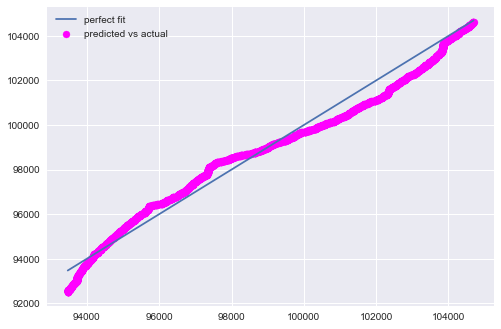

In [51]:
# plot actual vs predicted value
actual = []
actual.extend(y_train)
actual.extend(y_valid)
actual.extend(y_test)
len(actual)

predicted = []
predicted.extend(y_train_pred)
predicted.extend(y_valid_pred)
predicted.extend(y_test_pred)
len(predicted)

plt.scatter(actual, predicted, color='magenta', label='predicted vs actual')
plt.plot(actual, actual, label='perfect fit')
plt.legend()

In [52]:
# x_train.shape
# y_train.shape
# length

In [53]:
train_x_pork = x_train.astype(float)
train_y_pork = y_train.astype(float)

In [54]:
# train_x_pork.dtype
train_y_pork.dtype

dtype('float64')

In [68]:
import tensorflow as tf

In [69]:
import gpflow
### length is the length of the training set input
dims = 1
length = len(x_train)

k = gpflow.kernels.Matern32(input_dim=dims, variance=1.,lengthscales=0.5)

meanf = gpflow.mean_functions.Linear(np.zeros((dims,length)),np.zeros(length))

m = gpflow.models.GPR(np.array(train_x_pork), np.array(train_y_pork.values).reshape(length,1), k, meanf)
m.likelihood.variance = 0.01

AttributeError: module 'tensorflow' has no attribute 'Session'

In [ ]:
m.as_pandas_table()

In [ ]:
gpflow.train.ScipyOptimizer().minimize(m)
# plot(m)
m.as_pandas_table()

In [ ]:
# Q is the "X" (input) of the test set

mean, var = m.predict_y(x_test)
mean

In [ ]:
results = np.zeros(688)
for i in range(0,688):    
    results[i] = mean[i][0]
results

In [ ]:
# plot actual vs predicted value
actual = []
# actual.extend(y_train)
# actual.extend(y_valid)
actual.extend(y_test.values)
len(actual)

predicted = []
# predicted.extend(y_train_pred)
# predicted.extend(y_valid_pred)
predicted.extend(results)
len(predicted)

plt.scatter(actual, predicted, color='magenta', label='predicted vs actual')
plt.plot(actual, actual, label='perfect fit')
plt.legend()

In [ ]:
# np.array(results).shape

In [ ]:
# results[0][1][0]

In [ ]:
# test = np.zeros(length)
# for i in range(length):
#     test[i] = results[0][0][i]
# plt.scatter(y_test, test)
# # plt.plot(np.arange(-120, 120), np.arange(-120, 120))
# plt.show()

In [ ]:
# plt.scatter(y_test, test)
# # plt.plot(np.arange(-120, 120), np.arange(-120, 120))
# plt.show()

### Combined code

In [ ]:
def plot(m):
    mean, var = m.predict_y(x_test)
    plt.figure(figsize=(12, 6))
    plt.plot(x_train, y_train, 'kx', mew=2)
    plt.plot(x_test, mean, 'b', lw=2)
    plt.fill_between(x_test[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color='blue', alpha=0.2)
    plt.xlim(-0.1, 1.1)
plot(m)

In [ ]:
origin_date = '2015-11-01' # starting date to normalize x axis (time in hours) to.

df_normalized = normalize_and_combine(origin_date)
display(df_normalized.head(), df_normalized.tail(), df_normalized.describe())

le = LabelEncoder()
labels = le.fit_transform(df_normalized['meterid'])
df_normalized = df_normalized.assign(label=labels)
display(df_normalized.head())

new_groups = df_normalized.groupby('meterid')
new_keys = groups.groups.keys()  # keys: an iterable of dataids or meter ids

new_id_list = list(new_keys)
display(new_id_list, len(new_id_list))

for meterid in new_id_list:
    # do linear models.